## qRAM: Quantum Random Access Memory

In classical computers, RAM (Random Access Memory) is a type of volatile memory that has memory addresses $j$ and stores binary data corresponding to each address $D_j$.

In the case of [qRAM](https://arxiv.org/abs/0708.1879) in a quantum computer, address qubits $a$ have the $N$-addresses as superposition and the corresponding binary data is stored in data qubits $d$ as a state vector.
\\[
\sum_{j}\frac{1}{\sqrt{N}}\vert j \rangle_{a}\vert 0 \rangle_{d}\xrightarrow{qRAM}\sum_{j}\frac{1}{\sqrt{N}}\vert j \rangle_{a}\vert D_{j} \rangle_{d}
\\]　　
We call the right-hand side state "qRAM" and the corresponding gate operation "qRAM operation".

Although qRAM operation requires $\mathcal{O}(N\log N)$ gates, it can be used to create superposition states of binary data intuitively.

qRAM has previously been applied to various quantum machine learning algorithms such as the HHL algorithm. For this problem, let's apply qRAM to Grover's algorithm.


## Example: Find the data from qRAM
Prepare a qRAM of $n$-addresses in which the numbers $k_0, k_1, .. , k_{n-1}$ are stored in this order.
Find the address in which the number $m$ is stored using Grover's algorithm.
- $n = 4$
- $k = [1,2,5,7]$
- $m = 7$

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from IPython.display import display
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-23 12:02:27,865: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
def execute_circuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circuit, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
    #job = execute(qc, backend=backend, shots=8192)
    result = job.result()
    count = result.get_counts()
    print(count)

In [14]:
def qram(circuit, address_register, data_register):
    # address 0 -> data = 1 (001)
    circuit.x([address_register[0],address_register[1]])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.x([address_register[0],address_register[1]])
    circuit.barrier()
    # address 1 -> data = 2 (010)
    circuit.x(address_register[0])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.x(address_register[0])
    circuit.barrier()
    # address 2 -> data = 5 (101)
    circuit.x(address_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.x(address_register[1])
    circuit.barrier()
    # address 3 -> data = 7 (111)
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.barrier()

<ipython-input-12-63f47fcc554a>:3: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(circuit, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})


{'00001': 2008, '10101': 2039, '11111': 1964, '01010': 1989}


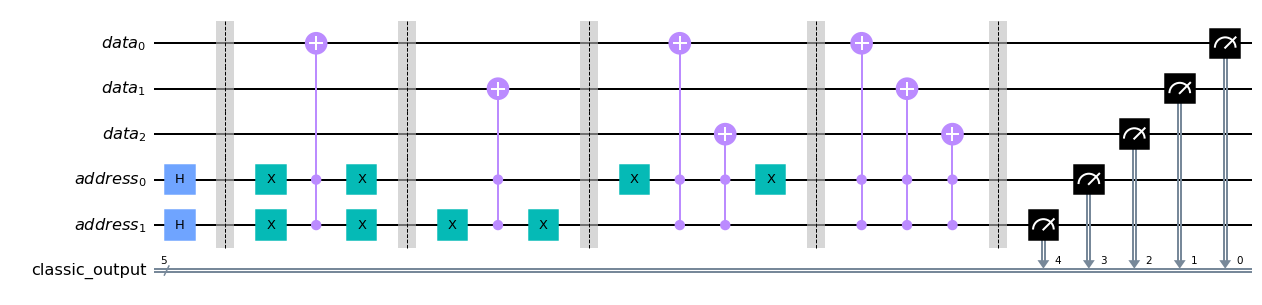

In [15]:
address = QuantumRegister(2, 'address')
data = QuantumRegister(3, 'data')
classic = ClassicalRegister(5, 'classic_output')
qc = QuantumCircuit(address, data, classic)

# address preparation
qc.h([address[0],address[1]])
qc.barrier()

# qram
qram(qc, address, data)

#Check the qRAM　status
qc.measure(address[0:2], classic[0:2])
qc.measure(data[0:3], classic[2:5])

# Reverse the output string.
qc = qc.reverse_bits()

#backend = provider.get_backend('ibmq_qasm_simulator')
execute_circuit(qc)

qc.draw(output='mpl')